In [54]:
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import metrics
import pickle
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.cluster import KMeans

In [55]:
raw_data_1 = pd.read_csv("./Preprocessing.csv")

raw_data_1.head(100)

,kode,nama_tender,instansi,status_tender,hps,5,6,7,8,9,...,12,13,kategori,pagu,hps_detail,nama_pemenang,alamat_pemenang,npwp_pemenang,penawaran_pemenang,preprocessing
0,6599119,Tenaga Ahli Data Driven Kegiatan Koordinasi Se...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],120 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli data driven kegiatan koordinasi se...
1,6598119,Tenaga Ahli IT Analisa Sistem Kegiatan Koord...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"183,5 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli it analisa sistem kegiatan koordin...
2,6597119,Tenaga Ahli Senior Monitoring dan Evaluasi Str...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"228,4 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli senior monitoring evaluasi strateg...
3,6596119,Tenaga Ahli Senior Perencanaan Strategic Natio...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"254,1 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli senior perencanaan strategic natio...
4,6595119,Tenaga Ahli Muda Bidang Energy Policy Kegiatan...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],132 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli muda bidang energy policy kegiatan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6420119,Pengadaan Generator Set 100 Kva / 80 Kw,PDAM Tirta Moedal,Tender Sudah Selesai,335 Jt,Pascakualifikasi Satu File,Tender Cepat,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2019,3,...,NaN,0,Pengadaan Barang,"Rp 375.375.000,00","Rp 335.038.000,00",MITRA NUSANTARA,Jalan Cakra I No.22 RT.1 RW.18 Cokrowijayan Ba...,01.464.445.4-542.000,"Rp 305.789.000,00",pengadaan generator set 100 kva 80 kw
96,6419119,Pengadaan Gate Valve Tahun 2019 <span class='l...,PDAM Tirta Aji Kabupaten Wonosobo,Tender Sudah Selesai,"316,3 Jt",Pascakualifikasi Satu File,Tender Cepat,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2019,3,...,NaN,0,Pengadaan Barang,"Rp 316.564.600,00","Rp 316.322.875,00",PT.TRISUKSES PERMATA,Kirana Two Building lt 10 - A Jalan Boulevard ...,75.555.231.2-043.000,"Rp 315.099.191,00",pengadaan gate valve tahun 2019 span class='la...
97,6418119,Management Pressur Jaringan Distribusi <span c...,PDAM Tirta Aji Kabupaten Wonosobo,Tender Sudah Selesai,468 Jt,Pascakualifikasi Satu File,Tender Cepat,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2019,3,...,NaN,0,Pengadaan Barang,"Rp 468.120.400,00","Rp 467.996.100,00",PT.TRISUKSES PERMATA,Kirana Two Building lt 10 - A Jalan Boulevard ...,75.555.231.2-043.000,"Rp 459.923.836,90",management pressur jaringan distribusi span cl...
98,6417119,Pengadaan Pemancar FM 1 KW + Antena + Coaxcial...,Lembaga Penyiaran Radio Republik Indonesia,Tender Sudah Selesai,"728,9 Jt",Pascakualifikasi Satu File,Tender,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2019,3,...,NaN,0,Pengadaan Barang,"Rp 729.402.000,00","Rp 728.900.000,00",PT. GITA MENATA INDAH,"JL. UTAN KAYU RAYA, NO. 63, RT. 011/005, KEL. ...",71.713.274.0-008.000,"Rp 710.160.000,00",pengadaan pemancar fm 1 kw antena coaxcial ins...


In [56]:
raw_data_1.select_dtypes('object').isna().sum()

nama_tender              0
instansi                 0
status_tender            0
hps                      0
5                        0
6                        0
7                        0
8                        0
10                       0
kategori               663
pagu                   663
hps_detail             663
nama_pemenang          663
alamat_pemenang        663
npwp_pemenang          663
penawaran_pemenang    1163
preprocessing            0
dtype: int64

In [57]:
kmeans_obj = pickle.load(open("kmeans.pickle","rb"))
vectorNormalize = pickle.load(open("vectorNormalize.pickle","rb"))
result_clustering = kmeans_obj.predict(vectorNormalize)

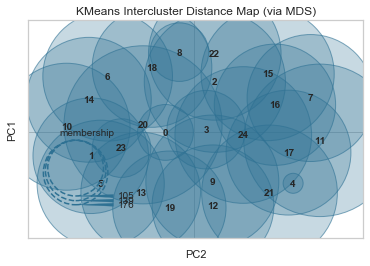

In [58]:
visualizer_kmeans = InterclusterDistance(kmeans_obj, random_state = 50)
visualizer_kmeans.fit(vectorNormalize)
visualizer_kmeans.finalize()

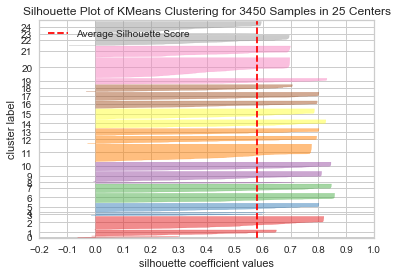

In [59]:
visualizer_kmeans_silhouette = SilhouetteVisualizer(kmeans_obj, color='yellowbrick')
visualizer_kmeans_silhouette.fit(vectorNormalize)
visualizer_kmeans_silhouette.show()

In [60]:
labels = kmeans_obj.labels_
silhouette_score = metrics.silhouette_score(vectorNormalize, labels, metric='euclidean')
silhouette_score

0.5783311361383423

In [61]:
raw_data_1['kategori'] = result_clustering
raw_data_1

,kode,nama_tender,instansi,status_tender,hps,5,6,7,8,9,...,12,13,kategori,pagu,hps_detail,nama_pemenang,alamat_pemenang,npwp_pemenang,penawaran_pemenang,preprocessing
0,6599119,Tenaga Ahli Data Driven Kegiatan Koordinasi Se...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],120 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli data driven kegiatan koordinasi se...
1,6598119,Tenaga Ahli IT Analisa Sistem Kegiatan Koord...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"183,5 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,22,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli it analisa sistem kegiatan koordin...
2,6597119,Tenaga Ahli Senior Monitoring dan Evaluasi Str...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"228,4 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,24,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli senior monitoring evaluasi strateg...
3,6596119,Tenaga Ahli Senior Perencanaan Strategic Natio...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"254,1 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,9,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli senior perencanaan strategic natio...
4,6595119,Tenaga Ahli Muda Bidang Energy Policy Kegiatan...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],132 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,15,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli muda bidang energy policy kegiatan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,40119,Pengadaan Working Furniture <span class='label...,Lembaga Kebijakan Pengadaan Barang/Jasa Pemeri...,Tender Sudah Selesai,"281,8 Jt",Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,20,"Rp 281.825.500,00","Rp 281.825.500,00",CV.PULAU CANDI UTAMA,"Jl. Kramat Raya No.23 E Lt 1 Senen, Jakarta Pu...",01.626.119.0-023.000,"Rp 226.369.000,00",pengadaan working furniture span class='label ...
3446,39119,Pengadaan Living Furniture <span class='label ...,Lembaga Kebijakan Pengadaan Barang/Jasa Pemeri...,Tender Sudah Selesai,"290,2 Jt",Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,23,"Rp 290.237.200,00","Rp 290.237.200,00",PT. Desaku Abadi,"Jl. Kedoya Raya No.53, Kedoya Selatan, Kebon J...",01.724.673.7-039.000,"Rp 251.541.400,00",pengadaan living furniture span class='label l...
3447,36119,PENGADAAN PERALATAN GEROBAK HOME INDUSTRI,Pemerintah Provinsi Bengkulu,Tender Sudah Selesai,"208,3 Jt",Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,24,NaN,NaN,NaN,NaN,NaN,NaN,pengadaan peralatan gerobak home industri
3448,32119,Pengadaan Modul Aplikasi - SIB,Lembaga Kebijakan Pengadaan Barang/Jasa Pemeri...,Tender Sudah Selesai,600 Jt,Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,5,"Rp 600.000.000,00","Rp 600.000.000,00",PT JIREH DATA INTEGRA,KOMPLEK RUKO MEGA GROSIR CEMPAKA MAS BLOK M no...,31.177.558.9-027.000,"Rp 594.000.000,00",pengadaan modul aplikasi sib


In [62]:
tfidfVectorizer = TfidfVectorizer()
def search_weights(search_keys):  
    search_query_weights = search_keys.lower()
    tfidf_weights_matrix = tfidfVectorizer.fit_transform(raw_data_1['preprocessing'])
    search_query_weights = tfidfVectorizer.transform([search_keys])
    
    return search_query_weights, tfidf_weights_matrix

In [63]:
weights_search, tfidf_weights = search_weights('ahli tenaga')
print(weights_search)

  (0, 3064)	0.6989143686333333
  (0, 147)	0.7152053588430871


In [64]:
def cos_similarity(search_query_weights, tfidf_weights_matrix):

    cosine_distance = cosine_similarity(search_query_weights, tfidf_weights_matrix)
    similarity_list = cosine_distance[0]

    return similarity_list

In [65]:
similarity = cos_similarity(weights_search, tfidf_weights)
df = pd.DataFrame({'res':similarity})
df = df.sort_values(by=['res'],ascending=False)

index= []
for i in df.index: 
    index.append(i)

count=0
for i in index:
    print(raw_data_1['nama_tender'].loc[i])
    print('\n')
    count=count+1
    if count == 10:
        break

TENAGA AHLI BIDANG EVALUASI


Tenaga Ahli KPBU 2


Tenaga Ahli Ekonomi Wilayah


Tenaga Ahli Komunikasi Publik


Pengadaan Tenaga Ahli Komunikasi KPPIP


Tenaga Ahli Bidang Pengembangan Wilayah


Pengadaan Jasa Konsultan Tenaga Ahli Ekonomi Pembangunan


Tenaga Ahli Project Manager


Pengadaan Jasa Konsultan Tenaga Ahli Kelembagaan


Tenaga Ahli Monitoring dan Evaluasi Infrastruktur




In [66]:
category = raw_data_1['kategori'].loc[index[0]]

In [68]:
for i in range(len(raw_data_1)):
    if raw_data_1['kategori'].loc[i] == category:
        print(raw_data_1['nama_tender'].loc[i])

Tenaga Ahli Senior Monitoring dan Evaluasi Strategic National ICT  Kegiatan Koordinasi Sekretariat Dewan Tik Nasional TA 2020
Tenaga Ahli Muda GIS Kegiatan Koordinasi Strategis Pelaksanaan DAK Transportasi
Tenaga Ahli Kelembagaan dan Kebijakan Publik Kegiatan Koordinasi Strategis Pelaksanaan DAK Transportasi
Tenaga Ahli Ekonomi Kegiatan Koordinasi Strategis Pelaksanaan DAK Transportasi
Tenaga Ahli Monitoring dan Evaluasi Kegiatan Koordinasi Strategis Pelaksanaan DAK Transportasi
Tenaga Ahli Muda Project Management Kegiatan Persiapan dan Pengembangan Program Compact Tahap II
Tenaga Ahli/Konsultan Bidang Konservasi Sumber Daya Alam dan Lingkungan
Tenaga Ahli /Konsultan Bidang Studi Pengelolaan Sumber Daya Alam dan Lingkungan/Kebijakan Publik
TENAGA AHLI/KONSULTAN BIDANG EKONOMI   SUMBER DAYA ALAM DAN LINGKUNGAN
TENAGA AHLI/KONSULTAN BIDANG PENGELOLAAN   SUMBER DAYA ALAM DAN LINGKUNGAN HIDUP
PENGADAAN TENAGA AHLI/KONSULTAN INDIVIDUAL BIDANG EVALUASI DALAM RANGKA PELAKSANAAN KEGIATAN KOORD